# Week 9 Matplotlib
## Part 1- Intro to Matplotlib
## Exercise 1 - Line Graph 
### 1,2,3,4

In [3]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [4]:
x = [0,2,4,5,8,10]
y = [1,3,3,3,4,5,6]
plt.plot(x,y) #error dimensions must agree

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

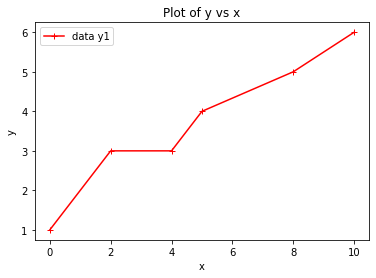

In [10]:
x = [0,2,4,5,8,10]
y = [1,3,3,4,5,6]
plt.plot(x,y,'r+-',label = "data y1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y vs x")
plt.legend()
plt.show()

For more options on plt.legend(), including positioning on the graph,  please refer to the docs link can be found [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)
## Part 2 Saving plot and importing
## Exercise 2 Histogram and csv 
### 1,2
Below are two implementations of the function DiceRolls one returning an array with values between 1 and 6 for a specified array of length $n$ and the other saving the result of the dice rolls in a CSV file. <br>
More information on CSV files can be found [here](https://en.wikipedia.org/wiki/Comma-separated_values)

In [4]:
def DiceRolls(n):
   return np.random.randint(1,7,n)
print(DiceRolls(10))

[5 2 1 4 6 4 5 1 3 5]


In [5]:
def DiceRollsCSV(n):
    with open('diceRolls.csv',mode='w') as file:
        write = csv.writer(file, delimiter = ',')# setting the delimeter to comma in accordance with the csv format
        write.writerow(np.random.randint(1,7,n))


In [59]:
DiceRollsCSV(100000)

### 3,4
All the csv data is on 1 row so the for loop isn't really necessary; however, after the writerow operation we performed earlier the "cursor" has been moved to a new row we need to check if the row isn't empty to avoid adding an empty array to our data. <br>
This data is in string format the map function allows us to typecast the entire list to integers

In [60]:
data = [] 
with open('diceRolls.csv', newline='') as csvfile:
    file = csv.reader(csvfile, delimiter=',')
    for row in file:
        if len(row) != 0:
            data = row
data = list(map(int,data))

(array([16726., 16426., 16844., 16645., 16616., 16743.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <BarContainer object of 6 artists>)

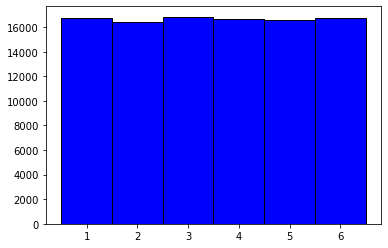

In [61]:
plt.hist(data, bins=np.arange(1, 8), histtype = 'bar', rwidth=1, facecolor = 'blue', edgecolor="k",align ='left')


As expected the number distribution of dice rolls should approach a uniform distribution when more trials are performed. The number of bins and the align parameter allows us to center the graph neatly. 
You can play around with the setings and see how the graph display changes
## Part 3 Curve Fitting
### 1,2,3,4,5

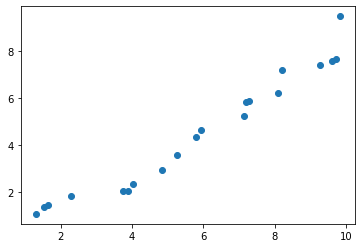

In [31]:
x = np.random.uniform(1.0,10,20)
y = np.random.uniform(1.0,10,20)
plt.scatter(np.sort(x),np.sort(y))

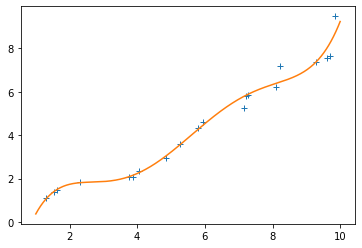

In [32]:
coefs  = np.polyfit(np.sort(x),np.sort(y),5) # a,b,c ... 
x_range = np.linspace(1,10,500) 
y_range = np.poly1d(coefs)(x_range)
plt.plot(np.sort(x),np.sort(y),'+',x_range,y_range)
plt.show()

Once you have obtained coefficents for the polynomial applying it to more points allows you to have a smoother line. <br>
You may have noticed that increasing the degree of the polynomial makes for a curve approximating more points.This means that the standard deviation between the line and data points is low but does it represent the data accurately ? For those of you who will continue on and study data science you will find that this becomes a case of [overfitting](https://en.wikipedia.org/wiki/Overfitting#:~:text=In%20statistics%2C%20overfitting%20is%20%22the,or%20predict%20future%20observations%20reliably%22.&text=Under%2Dfitting%20would%20occur%2C%20for,model%20to%20non%2Dlinear%20data).

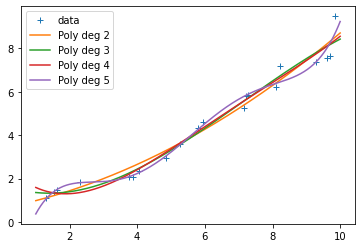

In [33]:
plt.plot(np.sort(x),np.sort(y),'+',label = "data")
for i in range(2,6):
    coefs  = np.polyfit(np.sort(x),np.sort(y),i) # a,b,c ... 
    x_range = np.linspace(1,10,500) 
    y_range = np.poly1d(coefs)(x_range)
    plt.plot(x_range,y_range, label = "Poly deg "+str(i))
    plt.legend()
plt.show()